# Feature Engineering by Ourselves

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from tensorflow import keras
from scipy.stats.mstats import gmean
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

### Read Data

In [2]:
X_df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
X_df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')
IDtest = X_df_test.custid.unique()

### EDA

- custid	고객 아이디 -> categoricl
- sales_month	판매월(13은 다음해 1월을 의미)-> categoricl
- sales_day	판매일-> categoricl
- sales_dayofweek	판매요일-> categoricl
- sales_time	판매시간 -> 애매..
- str_nm	지점명 -> categorical
- goodcd	상품코드 -> categorical (너무 많아서 일단 보류)
- brd_nm	브랜드이름 -> categorical
- corner_nm	코너이름 -> categorical
- pc_name	상품군이름 -> categorical
- part_nm	상품관리파트이름 -> categorical
- team_nm	상품관리팀이름 -> categorical
- buyer_nm	바이어이름 -> categorical
- import_flg	수입품여부 -> categorical (counting)
- tot_amt	구매금액 -> numerical
- dis_amt	할인금액 -> numerical 
- net_amt	실구매액 -> numerical
- inst_mon	할부개월 -> numerical
- inst_fee	무이자할부여부(0:무이자) 

- 추가가능한 컬럼
    - 할인율

In [5]:
print("Summary describe of X_df_train")
display(X_df_train.describe())
print("="*50)
print("Unique numbers of X_df_train")
display(X_df_train.nunique())

print("Summary describe of X_df_test")
display(X_df_test.describe())
print("="*50)
print("Unique numbers of X_df_test")
display(X_df_test.nunique())

Summary describe of X_df_train


,custid,sales_month,sales_day,sales_time,goodcd,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
count,625084.000000,625084.000000,625084.000000,625084.000000,6.250840e+05,625084.000000,6.250840e+05,6.250840e+05,6.250840e+05,625084.000000,625084.000000
mean,14966.412573,10.484023,14.692792,1549.217513,3.936181e+12,0.136863,9.913550e+04,3.443273e+03,9.569223e+04,1.876234,0.028486
std,8640.140929,3.532202,8.690312,247.481211,9.209220e+11,0.343703,3.127940e+05,1.442544e+04,3.036304e+05,1.298469,0.166356
min,0.000000,5.000000,1.000000,23.000000,2.101013e+12,0.000000,-7.200000e+07,-1.479000e+06,-7.200000e+07,1.000000,0.000000
25%,7514.000000,7.000000,7.000000,1340.000000,2.700000e+12,0.000000,2.332000e+04,0.000000e+00,2.295000e+04,1.000000,0.000000
50%,14855.000000,10.000000,14.000000,1550.000000,4.202285e+12,0.000000,5.360000e+04,0.000000e+00,5.206000e+04,1.000000,0.000000
75%,22459.000000,14.000000,22.000000,1743.000000,4.404861e+12,0.000000,1.202000e+05,3.920000e+03,1.178000e+05,3.000000,0.000000
max,29999.000000,16.000000,31.000000,2204.000000,8.801192e+12,1.000000,7.200000e+07,1.479000e+06,7.200000e+07,12.000000,1.000000


Unique numbers of X_df_train


custid             21587
sales_month           12
sales_day             31
sales_dayofweek        7
sales_time           503
str_nm                 4
goodcd              9750
brd_nm              1848
corner_nm            308
pc_nm                 77
part_nm               30
team_nm                4
buyer_nm              35
import_flg             2
tot_amt            62646
dis_amt             6693
net_amt            68460
inst_mon              12
inst_fee               2
dtype: int64

Summary describe of X_df_test


,custid,sales_month,sales_day,sales_time,goodcd,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
count,414955.000000,414955.000000,414955.000000,414955.000000,4.149550e+05,414955.000000,4.149550e+05,4.149550e+05,4.149550e+05,414955.000000,414955.000000
mean,39991.789018,10.503320,14.637975,1550.282047,3.945902e+12,0.138716,1.005524e+05,3.494709e+03,9.705772e+04,1.881096,0.027673
std,5813.263863,3.535228,8.697223,246.202905,9.235752e+11,0.345651,2.718856e+05,1.373720e+04,2.623868e+05,1.283216,0.164034
min,30001.000000,5.000000,1.000000,26.000000,2.101013e+12,0.000000,-1.958700e+07,-1.090000e+06,-1.899939e+07,1.000000,0.000000
25%,34920.000000,7.000000,7.000000,1342.000000,2.700000e+12,0.000000,2.400000e+04,0.000000e+00,2.340000e+04,1.000000,0.000000
50%,39865.000000,10.000000,14.000000,1550.000000,4.203160e+12,0.000000,5.401200e+04,0.000000e+00,5.225000e+04,1.000000,0.000000
75%,45090.000000,14.000000,22.000000,1743.000000,4.405230e+12,0.000000,1.240000e+05,4.000000e+03,1.187500e+05,3.000000,0.000000
max,49994.000000,16.000000,31.000000,2153.000000,8.801192e+12,1.000000,1.958700e+07,1.090000e+06,1.899939e+07,12.000000,1.000000


Unique numbers of X_df_test


custid             14380
sales_month           12
sales_day             31
sales_dayofweek        7
sales_time           474
str_nm                 4
goodcd              9168
brd_nm              1800
corner_nm            305
pc_nm                 76
part_nm               29
team_nm                3
buyer_nm              34
import_flg             2
tot_amt            47488
dis_amt             5719
net_amt            52359
inst_mon              12
inst_fee               2
dtype: int64

what do I have to do?
- aggregate with groupby and make to fit the form of y_train
- which is to separate numerical features and categorical ones.
- then, For the numerical, change the information with count, sum or so.
- For the categorical, most of them would be changed to dummies.
- Finally but not lastly, I have to get the size (n * number of unique custid) DF.
- after these, I can do anything I want.


About data,
- custid 컬럼에서 값들은 순서대로 빠짐없이 있는게 아니라 중간중간에 비어있는 id도 존재한다. 즉, custid는 그냥 unique한 고객 이름이라고 보면된다.

In [6]:
# 데이터 전처리를 한꺼번에 하기위해 train data와 test data를 합친다
df_all = pd.concat([X_df_train, X_df_test])
display(df_all)
print("Unique numbers of df_all")
display(df_all.nunique())

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414950,49993,13,31,수,1750,신촌점,4405551020474,톰키드,아동,아동,아동문화,잡화가용팀,유아동복,0,20000,0,20000,1,0
414951,49993,13,31,수,1833,신촌점,2139140008300,폴로화장품,향수,화장품,패션잡화,잡화가용팀,화장품,0,70000,3500,66500,1,0
414952,49994,16,14,토,1750,본점,4230120011274,스테파넬,영트랜드,영트렌디,"케주얼,구두,아동",의류패션팀,영캐주얼,0,39000,0,39000,1,0
414953,49994,16,14,토,1810,본점,4409271026010,써스데이아일앤드,진케주얼,진케주얼,"케주얼,구두,아동",의류패션팀,유니캐주얼,0,34200,0,34200,1,0


Unique numbers of df_all


custid             35967
sales_month           12
sales_day             31
sales_dayofweek        7
sales_time           576
str_nm                 4
goodcd             10412
brd_nm              1873
corner_nm            308
pc_nm                 77
part_nm               30
team_nm                4
buyer_nm              35
import_flg             2
tot_amt            83294
dis_amt             8039
net_amt            90676
inst_mon              12
inst_fee               2
dtype: int64

In [7]:
print("check the types of all features")
df_all.info()
print("="*80)

print("types of all features after converting types which have to be 'object' type")
df_all["sales_month"] = df_all["sales_month"].astype("object")
df_all["sales_day"] = df_all["sales_day"].astype("object")
df_all["goodcd"] = df_all["goodcd"].astype("object")
df_all.info()
print("="*80)

check the types of all features
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040039 entries, 0 to 414954
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   custid           1040039 non-null  int64 
 1   sales_month      1040039 non-null  int64 
 2   sales_day        1040039 non-null  int64 
 3   sales_dayofweek  1040039 non-null  object
 4   sales_time       1040039 non-null  int64 
 5   str_nm           1040039 non-null  object
 6   goodcd           1040039 non-null  int64 
 7   brd_nm           1040039 non-null  object
 8   corner_nm        1040039 non-null  object
 9   pc_nm            1040039 non-null  object
 10  part_nm          1040039 non-null  object
 11  team_nm          1040039 non-null  object
 12  buyer_nm         1040039 non-null  object
 13  import_flg       1040039 non-null  int64 
 14  tot_amt          1040039 non-null  int64 
 15  dis_amt          1040039 non-null  int64 
 16  net_a

### Aggregation & One-Hot-Encoding
#### 수치형데이터는 집계만 진행하고 범주형데이터는 원핫인코딩 실행 후 집계진행

In [8]:
# 1) sales_time (판매시간)을 제외한 모든 categorical features를 dummies로 변환
# * 메모리 문제로 goodcd(상품코드)도 제외하고 dummies로 변환
# * 메모리 문제로 brd_nm(브랜드이름)도 제외하고 dummies로 변환
cat_features = pd.get_dummies(df_all[["custid", "sales_month", "sales_day", 
                                      "sales_dayofweek", "str_nm", "corner_nm", 
                                      "pc_nm", "part_nm", 
                                      "team_nm", "buyer_nm"]])
                     
display(cat_features)
#display(cat_features.columns)

,custid,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,sales_month_13,...,buyer_nm_트래디셔널캐주얼,buyer_nm_피혁A,buyer_nm_피혁B,buyer_nm_행사장(남성),buyer_nm_행사장(아동스포츠),buyer_nm_행사장(여성정장),buyer_nm_행사장(여성캐주얼),buyer_nm_행사장(여성캐쥬),buyer_nm_행사장(잡화),buyer_nm_화장품
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414950,49993,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414951,49993,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
414952,49994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414953,49994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 2) custid 별로 각 features들의 값들을 합친다.
#cat_features_sum = cat_features.groupby(cat_features["custid"]).sum()
# 한꺼번에 합치기는 역시 너무 오래걸린다
# 한 컬럼을 잡고 sum() group by 'custid' 를 해준다
# 그걸 for 문을 돌려서 오래걸리더라도 메모리의 소비를 줄인다.

# 첫 컬럼으로 틀을 잡는다
cat_features_each = cat_features.iloc[:,1:2].groupby(cat_features["custid"]).sum()

# 나머지 컬럼을 for문 돌린다
for i in tqdm(range(2,len(cat_features.columns))):
    # 왼쪽부터 차례대로 sum을 해나가면서
    cat_features_ea = cat_features.iloc[:,i].groupby(cat_features["custid"]).sum()
    # 하나씩 붙여나간다
    cat_features_each = pd.concat([cat_features_each, cat_features_ea], axis=1)

display(cat_features_each)

100%|████████████████████████████████████████████████████████████████████████████████| 507/507 [01:00<00:00,  8.44it/s]


,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,sales_month_13,sales_month_14,...,buyer_nm_트래디셔널캐주얼,buyer_nm_피혁A,buyer_nm_피혁B,buyer_nm_행사장(남성),buyer_nm_행사장(아동스포츠),buyer_nm_행사장(여성정장),buyer_nm_행사장(여성캐주얼),buyer_nm_행사장(여성캐쥬),buyer_nm_행사장(잡화),buyer_nm_화장품
custid,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,2,3,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,8
2,0,0,0,3,2,2,1,1,2,0,...,3,1,0,0,0,0,0,0,0,1
3,2,1,7,4,3,0,0,4,2,0,...,1,1,0,0,0,0,0,0,0,1
4,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2,3,6,4,5,5,2,1,0,0,...,4,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,0,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
49990,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49992,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [10]:
# 2)-1 brd_nm로 더미변수 생성 시도
cat_features_brd = pd.get_dummies(df_all[["custid", "brd_nm"]])
display(cat_features_brd.head())
print(cat_features_brd.shape)
print("brd_nm feature 처리 준비완료")

,custid,brd_nm_012베네통,brd_nm_1492,brd_nm_1492마일즈,brd_nm_3N,brd_nm_96NY,brd_nm_@one,brd_nm_A-AND,brd_nm_AB.F.Z,brd_nm_ABFZ,...,brd_nm_휘나래,brd_nm_휠라슈즈,brd_nm_휠라의류,brd_nm_휠라인티모,brd_nm_휠라키즈,brd_nm_휠라행사,brd_nm_휴고보스,brd_nm_휴먼앤휴먼,brd_nm_흙침대,brd_nm_희원상사
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1040039, 1874)
brd_nm feature 처리 준비완료


In [11]:
# 첫 컬럼으로 틀을 잡는다
cat_features_brdnm = cat_features_brd.iloc[:,1:2].groupby(cat_features_brd["custid"]).sum()

# 나머지 컬럼을 for문 돌린다
for i in tqdm(range(2,len(cat_features_brd.columns))):
    # 왼쪽부터 차례대로 sum을 해나가면서
    brd_columns = cat_features_brd.iloc[:,i].groupby(cat_features_brd["custid"]).sum()
    # 하나씩 붙여나간다
    cat_features_brdnm = pd.concat([cat_features_brdnm, brd_columns], axis=1)

display(cat_features_brdnm)

100%|██████████████████████████████████████████████████████████████████████████████| 1872/1872 [05:23<00:00,  5.79it/s]


,brd_nm_012베네통,brd_nm_1492,brd_nm_1492마일즈,brd_nm_3N,brd_nm_96NY,brd_nm_@one,brd_nm_A-AND,brd_nm_AB.F.Z,brd_nm_ABFZ,brd_nm_AEG,...,brd_nm_휘나래,brd_nm_휠라슈즈,brd_nm_휠라의류,brd_nm_휠라인티모,brd_nm_휠라키즈,brd_nm_휠라행사,brd_nm_휴고보스,brd_nm_휴먼앤휴먼,brd_nm_흙침대,brd_nm_희원상사
custid,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#3) numerical features를 따로 groupby 처리하고 수치들의 평균으로 나타낸다.
# 사실은 더 많은 시도를 할수있으나 처음이니까 평균만 포함하고 진행하자
# time은 일단 int로 놓고 rough하게 포함시킨다
# 추후에 time column은 자세하게 다뤄야한다.
num_features = df_all[["custid", "sales_time", "import_flg", "tot_amt", "dis_amt",
                       "net_amt", "inst_mon", "inst_fee"]]

#num_features_sum = num_features.groupby(num_features["custid"]).sum()
#display(num_features_sum)
num_features_mean = num_features.groupby(num_features["custid"]).mean()
display(num_features_mean)

,sales_time,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
custid,,,,,,,
0,1757.090909,0.636364,158363.636364,15836.363636,142527.272727,2.818182,0.000000
2,1537.090909,0.090909,340986.363636,23190.000000,317796.363636,3.454545,0.272727
3,1604.066667,0.000000,76683.333333,3055.333333,73628.000000,2.666667,0.100000
4,1434.000000,0.250000,261250.000000,5450.000000,255800.000000,4.500000,0.500000
5,1569.437500,0.187500,157929.968750,11289.375000,146640.593750,1.875000,0.000000
...,...,...,...,...,...,...,...
49988,1372.500000,0.250000,158000.000000,7900.000000,150100.000000,2.250000,0.000000
49990,1503.000000,1.000000,213000.000000,10650.000000,202350.000000,6.000000,1.000000
49992,1796.500000,0.500000,110500.000000,5525.000000,104975.000000,1.000000,0.000000


In [13]:
# 컬럼이름 끝에 mean이라고 붙여준다
num_features_mean = num_features_mean.add_suffix("_mean")
display(num_features_mean)

,sales_time_mean,import_flg_mean,tot_amt_mean,dis_amt_mean,net_amt_mean,inst_mon_mean,inst_fee_mean
custid,,,,,,,
0,1757.090909,0.636364,158363.636364,15836.363636,142527.272727,2.818182,0.000000
2,1537.090909,0.090909,340986.363636,23190.000000,317796.363636,3.454545,0.272727
3,1604.066667,0.000000,76683.333333,3055.333333,73628.000000,2.666667,0.100000
4,1434.000000,0.250000,261250.000000,5450.000000,255800.000000,4.500000,0.500000
5,1569.437500,0.187500,157929.968750,11289.375000,146640.593750,1.875000,0.000000
...,...,...,...,...,...,...,...
49988,1372.500000,0.250000,158000.000000,7900.000000,150100.000000,2.250000,0.000000
49990,1503.000000,1.000000,213000.000000,10650.000000,202350.000000,6.000000,1.000000
49992,1796.500000,0.500000,110500.000000,5525.000000,104975.000000,1.000000,0.000000


In [14]:
# 3)-1 합계, 최대, 최소로 집계하여 num_features_demo 생성
# 집계별 suffix (접미어)도 붙여준다.
num_features_sum = num_features.groupby(num_features["custid"]).sum()
num_features_sum = num_features_sum.add_suffix("_sum")

num_features_max = num_features.groupby(num_features["custid"]).max()
num_features_max = num_features_max.add_suffix("_max")

num_features_min = num_features.groupby(num_features["custid"]).min()
num_features_min = num_features_min.add_suffix("_min")

num_features_demo = pd.concat([num_features_mean, 
                               #num_features_sum,
                               #num_features_max, 
                               #num_features_min
                              ], axis=1)

display(num_features_demo.head())
print(num_features_demo.shape)

,sales_time_mean,import_flg_mean,tot_amt_mean,dis_amt_mean,net_amt_mean,inst_mon_mean,inst_fee_mean
custid,,,,,,,
0,1757.090909,0.636364,158363.636364,15836.363636,142527.272727,2.818182,0.000000
2,1537.090909,0.090909,340986.363636,23190.000000,317796.363636,3.454545,0.272727
3,1604.066667,0.000000,76683.333333,3055.333333,73628.000000,2.666667,0.100000
4,1434.000000,0.250000,261250.000000,5450.000000,255800.000000,4.500000,0.500000
5,1569.437500,0.187500,157929.968750,11289.375000,146640.593750,1.875000,0.000000


(35967, 7)


In [15]:
features_hj = pd.concat([cat_features_each, cat_features_brdnm, num_features_demo], axis=1)
display(features_hj.head())
print(features_hj.shape)

,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,sales_month_13,sales_month_14,...,brd_nm_휴먼앤휴먼,brd_nm_흙침대,brd_nm_희원상사,sales_time_mean,import_flg_mean,tot_amt_mean,dis_amt_mean,net_amt_mean,inst_mon_mean,inst_fee_mean
custid,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,2,3,0,0,3,0,0,...,0,0,0,1757.090909,0.636364,158363.636364,15836.363636,142527.272727,2.818182,0.000000
2,0,0,0,3,2,2,1,1,2,0,...,0,0,0,1537.090909,0.090909,340986.363636,23190.000000,317796.363636,3.454545,0.272727
3,2,1,7,4,3,0,0,4,2,0,...,0,0,0,1604.066667,0.000000,76683.333333,3055.333333,73628.000000,2.666667,0.100000
4,0,0,4,0,0,0,0,0,0,0,...,0,0,0,1434.000000,0.250000,261250.000000,5450.000000,255800.000000,4.500000,0.500000
5,2,3,6,4,5,5,2,1,0,0,...,0,0,0,1569.437500,0.187500,157929.968750,11289.375000,146640.593750,1.875000,0.000000


(35967, 2388)


수치형 데이터에 이상한 점이 발견됨.
- 총구매액에서 음수가 있다?! -> 즉, 환불한거래도 포함되어있다는 것임
- 그렇다면 환불 건에 대해서는 어떻게 다시 처리를 할것인가 고민해봐야함
- 그 뿐만이 아니라 EDA를 보다 더 심층적으로 해봐야함
- 내가 데이터분석을 하면서 이번에 새롭게 깨달은 사실은, 한 파트별로 오래동안 붙잡는것 보다는 일단 결과를 한번 뽑아보고 한 파트별로 시간을 내서 집중하는 것이 동기부여 측면에서 더 좋고, 바로바로 결과를 확인할 수 있어서 좋다!
- 수치형이나 범주형 모두 각 컬럼 하나하나를 뜯어보면서 상황에 맞는 피처를 생성해야한다.
- 또는 feature 수를 많이 늘린다음 feature selection을 진행할 수도 있다.

In [18]:
# 학습데이터와 테스트데이터 분리
X_train = features_hj.iloc[:len(X_df_train["custid"].unique())]
X_test = features_hj.iloc[len(X_df_train["custid"].unique()):]

y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')
IDtest = X_df_test.custid.unique()

y_train = y_train['age']

In [19]:
X_train.shape, X_test.shape, y_train.shape

((21587, 2388), (14380, 2388), (21587,))

In [22]:
X_columns=X_train.columns

### Data scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_columns)

In [26]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape

((21587, 2388), (14380, 2388), (21587,))

In [27]:
X_train_nothuman=X_train_scaled.copy()

In [28]:
X_test_nothuman=X_test_scaled.copy()

### feature selection

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [18:01<00:00, 11.39s/it]


(9, -9.309468317578482)


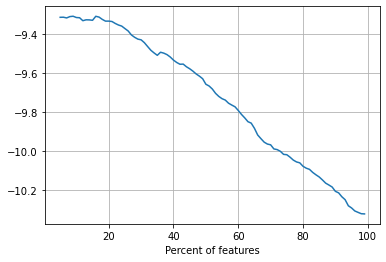

In [29]:
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = Ridge(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train_scaled, y_train)    #SelectPercentile: 지정된 비율만큼 특성을 선택한다.
    cv_score = cross_val_score(model, X_new, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [30]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_scaled, y_train)
X_train_select = fs.transform(X_train_scaled)
X_test_select = fs.transform(X_test_scaled)

In [31]:
print(X_train_select.shape, X_test_select.shape)
print(X_train_nothuman.columns[fs.get_support()].tolist()) 
#get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(21587, 219) (14380, 219)
['sales_month_5', 'sales_month_6', 'sales_month_7', 'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11', 'sales_month_12', 'sales_month_13', 'sales_month_14', 'sales_month_15', 'sales_month_16', 'sales_day_1', 'sales_day_2', 'sales_day_3', 'sales_day_4', 'sales_day_5', 'sales_day_6', 'sales_day_7', 'sales_day_8', 'sales_day_9', 'sales_day_10', 'sales_day_11', 'sales_day_12', 'sales_day_13', 'sales_day_14', 'sales_day_15', 'sales_day_16', 'sales_day_17', 'sales_day_18', 'sales_day_19', 'sales_day_20', 'sales_day_21', 'sales_day_22', 'sales_day_23', 'sales_day_25', 'sales_day_26', 'sales_day_27', 'sales_day_28', 'sales_day_29', 'sales_day_30', 'sales_day_31', 'sales_dayofweek_금', 'sales_dayofweek_목', 'sales_dayofweek_수', 'sales_dayofweek_월', 'sales_dayofweek_일', 'sales_dayofweek_토', 'sales_dayofweek_화', 'str_nm_무역점', 'str_nm_본점', 'str_nm_천호점', 'corner_nm_건강식품', 'corner_nm_건식품', 'corner_nm_곡물', 'corner_nm_골프(LC)', 'corner_nm_골프(국내)', 'corner_nm_골

In [ ]:
'''
# modeling
model_clf = DecisionTreeClassifier(max_depth=3, random_state=123)
model_clf.fit(X_train_demo, y_train)

# 차트에서 한글 출력을 위한 설정
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

# check feature importance
plt.figure(figsize=(10,15))
sns.barplot(x=model_clf.feature_importances_, y=all_features_demo.columns)
'''

In [33]:
pd.DataFrame(X_train_select).to_csv("X_train_select_hj.csv", index=False)
pd.DataFrame(X_test_select).to_csv("X_test_select_hj.csv", index=False)